In [1]:
import numpy as np
import re
import numpy as np
import pandas as pd
global alphabet
global maxlen
global N_LANG
N_LANG=10
maxlen=13 #max word lenght 13
alphabet = "abcdefghijklmnopqrstuvwxyzíóéáñúüäßöàèêçôùîûâìòźåãõíłęążśćńøæ" #61 different character found in 10 European different Language
def one_hot_encode(data):
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in data]
  onehot_encoded = []
  for value in integer_encoded:
    letter = np.zeros(len(alphabet))
    letter[value] = 1
    onehot_encoded.append(letter)
  while(len(onehot_encoded)<maxlen):
    letter = np.zeros(len(alphabet))
    onehot_encoded.append(letter)
  return  np.array(onehot_encoded)

def encode_labels(label):
  temp = np.zeros(N_LANG)
  temp[label-1] = 1
  return temp

def process(test_str):
  test_str=test_str.lower()
  test_str = re.sub(r'[^a-zA-Z ]', '', test_str)
  return test_str

In [2]:
x=[]
y=[]
df=pd.read_csv('https://github.com/404S-retr0/HPE_Project_Grp-8/blob/main/Data_Wordlists.csv?raw=true')
for word,lang in zip(df.WORDS,df.LANGAUAGE_VECTOR):
    if(pd.isna(word)):
      continue
    if(len(word)<=maxlen):
      x.append(one_hot_encode(process(word)))
      y.append(encode_labels(int(lang)))
x=np.array(x)
print(x.shape)
y=np.array(y)
print(y.shape)

(905779, 13, 61)
(905779, 10)


In [26]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)
network = Sequential()
network.add(Flatten())
network.add(Dense(400, input_dim=61*maxlen, activation='sigmoid'))
network.add(Dense(300, activation='sigmoid'))
network.add(Dense(200, activation='sigmoid'))
network.add(Dense(100, activation='sigmoid'))
network.add(Dense(N_LANG, activation='softmax'))
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
tboard = TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
callbacks_list = [checkpoint, tboard]
history=network.fit(x_train,y_train, epochs=100, batch_size=500, validation_data=(x_test,y_test),callbacks=callbacks_list,verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.91702, saving model to weights.hdf5

Epoch 00002: val_accuracy improved from 0.91702 to 0.91853, saving model to weights.hdf5

Epoch 00003: val_accuracy improved from 0.91853 to 0.91941, saving model to weights.hdf5

Epoch 00004: val_accuracy improved from 0.91941 to 0.92062, saving model to weights.hdf5

Epoch 00005: val_accuracy improved from 0.92062 to 0.92155, saving model to weights.hdf5

Epoch 00006: val_accuracy improved from 0.92155 to 0.92233, saving model to weights.hdf5

Epoch 00007: val_accuracy improved from 0.92233 to 0.92263, saving model to weights.hdf5

Epoch 00008: val_accuracy improved from 0.92263 to 0.92377, saving model to weights.hdf5

Epoch 00009: val_accuracy improved from 0.92377 to 0.92455, saving model to weights.hdf5

Epoch 00010: val_accuracy improved from 0.92455 to 0.92464, saving model to weights.hdf5

Epoch 00011: val_accuracy improved from 0.92464 to 0.92538, saving model to weights.hdf5

Epoch 00012:

In [55]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

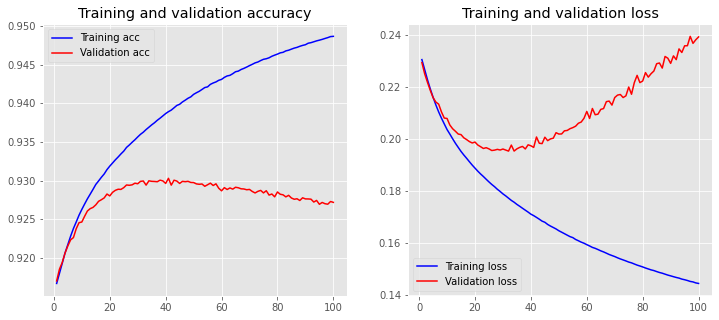

In [56]:
plot_history(history)

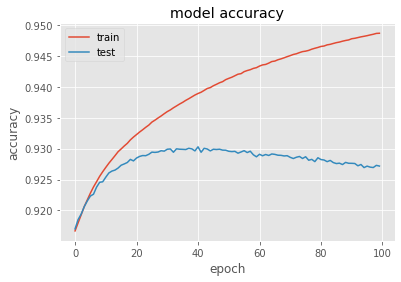

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
def text2list(text):
  import string
  import re
  test_str=text
  test_str = ''.join([i for i in test_str if not i.isdigit()]) 
  test_str=test_str.lower()
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~+-=|`'''

  for ele in test_str:
    if ele in punc:
      test_str = test_str.replace(ele, "")  

  test_str_split=re.split('\s+', test_str)
  
  if (test_str_split[0]==''):
    test_str_split.remove('')
  if (test_str_split[len(test_str_split)-1]==''):
    test_str_split.remove('')

  return test_str_split

In [59]:
def lang_detect(text):
    list_of_word=text2list(text)
    k=[]
    for word in list_of_word:
        k.append(one_hot_encode(process(word)))
        ans=network.predict(np.array(k))
    print('Predication of language belonging of each unique word from a sentence\n')
    eng=0
    dan=0
    dut=0
    fre=0
    ger=0
    ita=0
    pol=0
    por=0
    spa=0
    swe=0
    for q in range(len(list_of_word)):
        eng+=ans[q][0]
        dan+=ans[q][0]
        dut=ans[q][0]
        fre+=ans[q][0]
        ger+=ans[q][0]
        ita+=ans[q][0]
        pol+=ans[q][0]
        por+=ans[q][0]
        spa+=ans[q][0]
        swe+=ans[q][0]
        each_word=list_of_word[q]
        print(each_word)
        report = "Percentage Distribution\nEnglish:-{}\nDanish:-{}\nDutch:-{}\nFrench:-{}\nGerman:-{}\nItalian:-{}\nPolish:-{}\nPortuguese:-{}\nSpanish:-{}\nSwedish:-{}\n".format(eng,dan,dut,fre,ger,ita,pol,por,spa,swe)
        print(report)

In [60]:
lang_detect('hello my name is de')

Predication of language belonging of each unique word from a sentence

hello
Percentage Distribution
English:-0.13138674199581146
Danish:-0.13138674199581146
Dutch:-0.13138674199581146
French:-0.13138674199581146
German:-0.13138674199581146
Italian:-0.13138674199581146
Polish:-0.13138674199581146
Portuguese:-0.13138674199581146
Spanish:-0.13138674199581146
Swedish:-0.13138674199581146

my
Percentage Distribution
English:-0.2670610845088959
Danish:-0.2670610845088959
Dutch:-0.1356743425130844
French:-0.2670610845088959
German:-0.2670610845088959
Italian:-0.2670610845088959
Polish:-0.2670610845088959
Portuguese:-0.2670610845088959
Spanish:-0.2670610845088959
Swedish:-0.2670610845088959

name
Percentage Distribution
English:-0.3974965959787369
Danish:-0.3974965959787369
Dutch:-0.130435511469841
French:-0.3974965959787369
German:-0.3974965959787369
Italian:-0.3974965959787369
Polish:-0.3974965959787369
Portuguese:-0.3974965959787369
Spanish:-0.3974965959787369
Swedish:-0.3974965959787369

